<a href="https://colab.research.google.com/github/Ana-PPS/data-and-analytcs/blob/MVP_II/MVP_b_SprintII_AnaPaulaSalgado_entregav1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PUC Rio: Pós Graduação em Ciência de Dados e Analytics**

**MVP Sprint II: Machine Learning & Analytics**
**Parte b**

Aluna: Ana Paula Pinheiro Salgado

Julho/2023

## Seção I: Introdução
**Classificador de imagens multiclasse - Animais**

**Contexto:** Temos um conjunto de imagens que representam 4 categorias de animais: vaca, galinha, cavalo e elefante. O objetivo deste notebook é criar um modelo de visão computacional que consiga classificar uma imagem dentre essas categorias.

**Estrutura:** O notebook encontra-se dividido da seguinte forma:

- Importação das bibliotecas
- Acesso e tratamento dos dados que serão a entrada do modelo de deep learning
- Configuração do modelo de deep learning usando uma rede neural convolucional simples com Keras
- Treinamento do modelo de deep learning
- Execução do modelo de deep learning treinado
- Avaliação do modelo de deep learning
- Exportação do modelo de deep learning
- Teste do modelo exportado

**Dataset:** A partir do dataset original, baixado do Kaggle (https://www.kaggle.com/datasets/alessiocorrado99/animals10), foram selecionadas apenas 4 pastas de imagens de forma a otimizar o tempo de execução do MVP.

### Importando as bibliotecas necessárias para executar o notebook
(Serão utilizadas as bibliotecas pandas e numpy, para a manipulação dos dados; matplotlib, para geração de gráficos; os, para manipulação de pastas e diretórios e bibliotecas voltadas para Machine e Deep Learning, tais como Keras, Tensor Flow e Scikit-Learn)


In [ ]:
# para usar o Google Drive
!pip install -q gdown
import gdown
from google.colab import drive

#para acessar e manipular arquivos, diretórios e estrutra de dados
import os
import shutil
from zipfile import ZipFile
import pandas as pd

# cálculos numéricos e operações matemáticas e trabalhar com números aleatórios
import numpy as np
import math
import random

# bibliotecas do keras para pré-processamento, modelos convolucionais e otimizadores dos modelos
!pip install -q tensorflow
!pip install -q keras
from tensorflow import keras
from keras.optimizers import Adam
from keras.preprocessing import image
#from keras.layers.experimental import preprocessing
from keras.layers import BatchNormalization
from keras import layers,models,Model
#from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras.preprocessing import image as keras_image
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf

# sckit-learn para pré-processamento e uso de métricas em machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight, shuffle
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score
import sklearn.metrics as skm

# plotagem de gráficos, visualizações e imagens
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from skimage.io import imread
from skimage.transform import resize

# iterações
import itertools

# para uso de data e hora
from datetime import datetime

##Seção II: Acessando e tratando os dados que serão a entrada do modelo de deep learning

In [ ]:
# Baixando a pasta compactada para o notebook
file_id = "1bg_JhbuWv2lCCDyrfGI2yr5dROxbijYQ"

folder_path = f"https://drive.google.com/uc?id={file_id}"
output = "4animais.zip"
gdown.download(folder_path, output)

Downloading...
From: https://drive.google.com/uc?id=1bg_JhbuWv2lCCDyrfGI2yr5dROxbijYQ
To: /content/4animais.zip
100%|██████████| 174M/174M [00:05<00:00, 34.0MB/s]


'4animais.zip'

In [ ]:
# Descompactando o arquivo
with ZipFile('4animais.zip', 'r') as zip_object:
  zip_object.extractall()

In [ ]:
# Reunindo todos os arquivos em uma pasta para transformar em um dataset

path = "/content/"

classes = ['cavalo', 'elefante', 'galinha', 'vaca']

foldernames = os.listdir(path)

data = {"images": [], "animal": []}

for folder in classes:
    folderpath = os.path.join(path, folder)
    filelist = os.listdir(folderpath)
    for file in filelist:
        fpath = os.path.join(folderpath, file)
        data["images"].append(fpath)
        data["animal"].append(folder)


df = pd.DataFrame(data)

In [ ]:
print(df.head)
print(df.shape)

<bound method NDFrame.head of                                                  images  animal
0     /content/vaca/OIP-GXDFTn7XV7Mj3Z3qe42TzwHaFj.jpeg    vaca
1     /content/vaca/OIP-8fITi6odS5d7nFFrt3ZVkgHaEK.jpeg    vaca
2     /content/vaca/OIP-p4ifyEpq_1CNleQ0xQ9oNgHaHa.jpeg    vaca
3     /content/vaca/OIP-8Ix7idR6MNbiFTWAMxjUdwHaEU.jpeg    vaca
4     /content/vaca/OIP-vKiBGH0ARNIXUHnNFM048wHaFU.jpeg    vaca
...                                                 ...     ...
9028  /content/cavalo/OIP-L__JnPZRytR00r0S3PXOrwHaNK...  cavalo
9029  /content/cavalo/OIP-WZHi3EwD7cCjCDhP3kec9gHaLH...  cavalo
9030  /content/cavalo/OIP-gaEDIBAwmgABgflnIWR1XQHaE-...  cavalo
9031  /content/cavalo/OIP-oKwZqGUiJvFupyGSEClj3QHaGC...  cavalo
9032  /content/cavalo/OIP-Dy5E33g3dBaoh5HbiPiLbQHaK3...  cavalo

[9033 rows x 2 columns]>
(9033, 2)


In [ ]:
#Resumo do dataset criado

print("Tamanho do dataset: ", df.shape)
print("_______________________________________")
print("Valores null: ")
print(df.isnull().sum())
print("_______________________________________")
print("Valores únicos: ")
print(df.nunique())

print("_______________________________________")
print("Qnt de imagens por categoria : ")
print(df.animal.value_counts())

print("_______________________________________")
print("Informação do dataset: ")
print(df.info())

Tamanho do dataset:  (9033, 2)
_______________________________________
Valores null: 
images    0
animal    0
dtype: int64
_______________________________________
Valores únicos: 
images    9033
animal       4
dtype: int64
_______________________________________
Qnt de imagens por categoria : 
galinha     3098
cavalo      2623
vaca        1866
elefante    1446
Name: animal, dtype: int64
_______________________________________
Informação do dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9033 entries, 0 to 9032
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  9033 non-null   object
 1   animal  9033 non-null   object
dtypes: object(2)
memory usage: 141.3+ KB
None


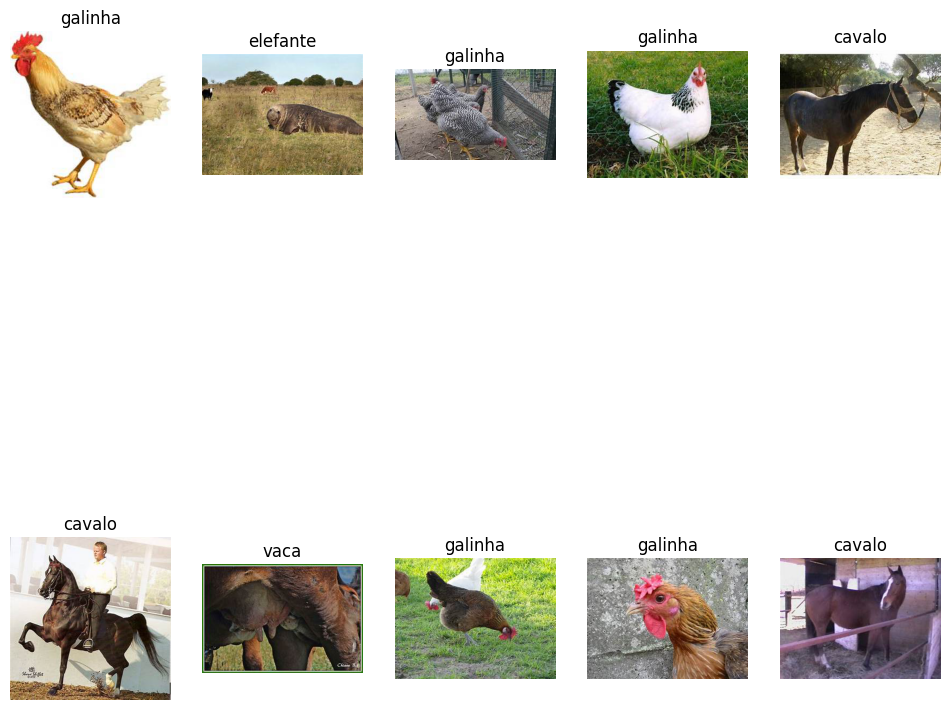

In [ ]:
#Visualizando algumas imagens do conjunto de dados
fig = plt.gcf()
fig.set_size_inches(3*4, 3*4)
for i, row in df.sample(n=10).reset_index().iterrows():
    plt.subplot(2,5,i+1)
    image_path = row['images']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["animal"])
    plt.axis('off')
plt.show()

In [ ]:
# Separação do dataframe em treino, teste e validação
df_train, Temp_df = train_test_split(df, train_size=0.7, random_state=13, shuffle=True)
df_test, df_val = train_test_split(Temp_df, test_size=0.6, random_state=30, shuffle=True)

In [ ]:
#Resumo da separação do conjunto de dados
print("#########Train##############")
print(df_train.head())
print(df_train.shape)
print("#########Test###############")
print(df_test.head())
print(df_test.shape)
print("#########Validação###############")
print(df_val.head())
print(df_val.shape)

#########Train##############
                                                 images    animal
4191  /content/galinha/OIP-_EVbG8aIl95u_WOlYf3k-QHaD...   galinha
6599  /content/cavalo/OIP-Btga3yh8ILdqwjZhJoV_zAHaFj...    cavalo
5582  /content/elefante/OIP-1msK2YztfEyXIlxlUTonPgHa...  elefante
7470  /content/cavalo/OIP-mQ9s7HHCvQvkWt_z5yDWUAAAAA...    cavalo
8510  /content/cavalo/OIP-GogV-ojINVQWDgPkECUNGgHaE6...    cavalo
(6323, 2)
#########Test###############
                                                 images    animal
6383  /content/elefante/OIP-mmNjPTEi-JVhv4aKiYpLGQHa...  elefante
6106  /content/elefante/OIP-7LSiJVl5T9JBJshmZXWNgQAA...  elefante
6823  /content/cavalo/OIP-KgwxiD45b_uxH1E5la6xeQHaGN...    cavalo
5102  /content/elefante/OIP-jLkVAsM3KcDx6MHP850cfAHa...  elefante
7155  /content/cavalo/OIP-6Nq1ZBalkb6pcX06ZoA8OwHaFh...    cavalo
(1084, 2)
#########Validação###############
                                                 images    animal
8026  /content/cavalo/OIP-xQ-M

###  Preparação dos dados

`ImageDataGenerator` é uma classe utilitária fornecida pelo TensorFlow para aumentar e pré-processar dados de imagens. É comumente usada em tarefas de deep learning, especialmente para classificação de imagens, para gerar imagens aumentadas (data augmentation) sob demanda durante o treinamento do modelo.

O Data Augmentation aplica transformações aleatórias nas imagens existentes, o que ajuda a evitar overfitting e torna o modelo mais robusto, expondo-o a uma variedade maior de variações nas imagens.


In [ ]:
# Definindo o tamanho do batch, a dimensão das imagens e a quantidade de épocas
batch_size = 20
img_height = 224
img_width = 224
num_classes = 4
epochs = 5  # número pequeno para acelerar a rodar o modelo

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

val_datagen=ImageDataGenerator(rescale=1./255)

test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_dataframe(
    dataframe=df_train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    x_col='images',
    y_col='animal',
    color_mode ='rgb',
    seed = 13,
    shuffle=False
    )

val_generator=val_datagen.flow_from_dataframe(
    dataframe=df_val,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    x_col='images',
    y_col='animal',
    color_mode ='rgb',
    shuffle=False
    )

test_generator=test_datagen.flow_from_dataframe(
    dataframe = df_test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    x_col='images',
    y_col='animal',
    color_mode ='rgb',
    shuffle=False)

Found 6323 validated image filenames belonging to 4 classes.
Found 1626 validated image filenames belonging to 4 classes.
Found 1084 validated image filenames belonging to 4 classes.


## Seção III: Configuração do Modelo de Deep Learning

### Configuração de um modelo de deep learning usando uma rede neural convolucional (CNN) simples com a biblioteca Keras

Aqui foi especificada uma camada convolucional 2D que possui 32 filtros(depois 64, 128 e 256) e função de ativação `ReLU`. Na sequência é adicionada uma camada `softmax` com a mesma função de ativação.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height,img_width,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# Resumindo o modelo que será utilizado
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

### Treinamento do modelo de deep learning

#### Compilação do modelo Keras com as configurações do treinamento.

`optimizer='adam'`: especifica o otimizador a ser usado durante o treinamento.

`loss='categorical_crossentropy'`: especifica a função de perda a ser usada durante o treinamento. Para problemas de classificação multiclasse, onde a variável alvo tem mais de duas categorias, a perda categórica de entropia cruzada é freqüentemente empregada.

`metrics=['accuracy']`: especifica as métricas de avaliação a serem usadas durante o treinamento e o teste.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5,
                                             restore_best_weights=True)])

Epoch 1/5
317/317 [==============================] - 85s 235ms/step - loss: 1.2609 - accuracy: 0.4492 - val_loss: 1.0307 - val_accuracy: 0.5873
Epoch 2/5
317/317 [==============================] - 75s 235ms/step - loss: 0.9502 - accuracy: 0.6073 - val_loss: 0.9242 - val_accuracy: 0.6285
Epoch 3/5
317/317 [==============================] - 75s 236ms/step - loss: 0.8417 - accuracy: 0.6510 - val_loss: 0.8250 - val_accuracy: 0.6697
Epoch 4/5
317/317 [==============================] - 75s 236ms/step - loss: 0.7867 - accuracy: 0.6813 - val_loss: 0.7412 - val_accuracy: 0.6986
Epoch 5/5
317/317 [==============================] - 75s 235ms/step - loss: 0.7253 - accuracy: 0.6990 - val_loss: 0.7894 - val_accuracy: 0.6907


#### Visualização de métricas da avaliação do modelo treinado

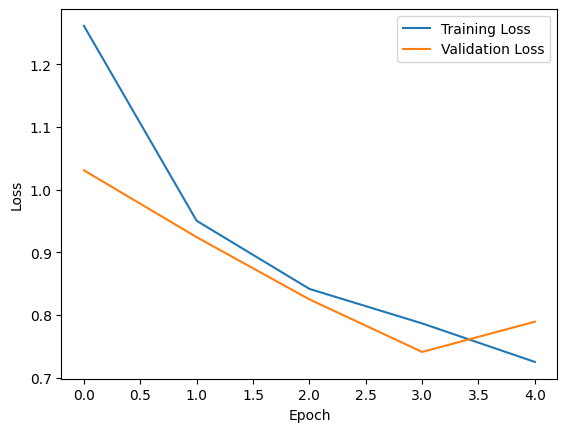

In [ ]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

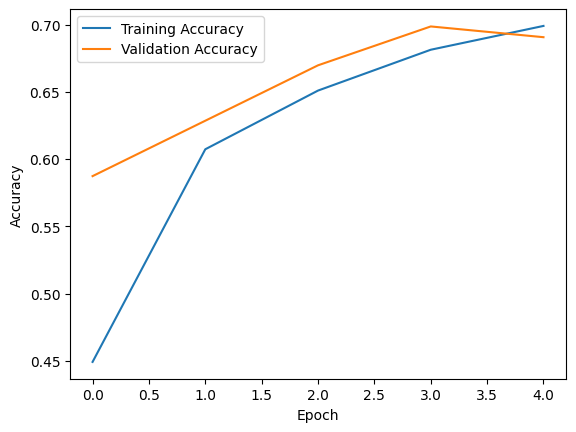

In [ ]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

O modelo na primeira arquitetura parece começar a apresentar overfitting, dado que a acurácia tende a um resultado bem superior no conjunto de treinamento, com tendência inversa no conjunto de validação. Começando a apresentar divergência de resultados a partir da 10ª época.

Para tentar melhorar a generalização e reduzir overfitting, será aplicado algumas camadas de dropout e uma camada Flatten para transformar os dados em um único vetor, preparando-os para camada Densa posterior.

### Otimização do 1º modelo

Nesta versão foi inserida uma camada de Dropout para tentar melhorar a generalização e reduzir overfitting, além de mais camadas para aumentar a complexidade visando melhorar a capacidade de aprendizado do modelo.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height,img_width,3)),
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),  # Aumentar a complexidade com mais unidades
    keras.layers.Dropout(0.2),  # Incluir mais uma camada de dropout
    keras.layers.Dense(128, activation='relu'),  # Adicionar outra camada Dense
    keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# Resumindo o modelo que será utilizado
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 55, 55, 128)      

### Treinamento com o modelo otimizado

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5,
                                             restore_best_weights=True)])


Epoch 1/5
317/317 [==============================] - 78s 237ms/step - loss: 1.2847 - accuracy: 0.4096 - val_loss: 1.1846 - val_accuracy: 0.4828
Epoch 2/5
317/317 [==============================] - 75s 237ms/step - loss: 1.0706 - accuracy: 0.5314 - val_loss: 0.9301 - val_accuracy: 0.5947
Epoch 3/5
317/317 [==============================] - 77s 242ms/step - loss: 0.9547 - accuracy: 0.5913 - val_loss: 0.9219 - val_accuracy: 0.5947
Epoch 4/5
317/317 [==============================] - 76s 238ms/step - loss: 0.8823 - accuracy: 0.6239 - val_loss: 0.7638 - val_accuracy: 0.6820
Epoch 5/5
317/317 [==============================] - 76s 238ms/step - loss: 0.8046 - accuracy: 0.6666 - val_loss: 0.7221 - val_accuracy: 0.7054


#### Visualização de métricas da avaliação do modelo treinado (modelo otimizado)

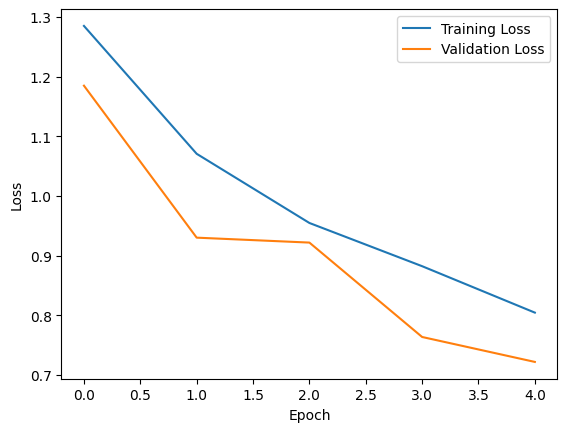

In [ ]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

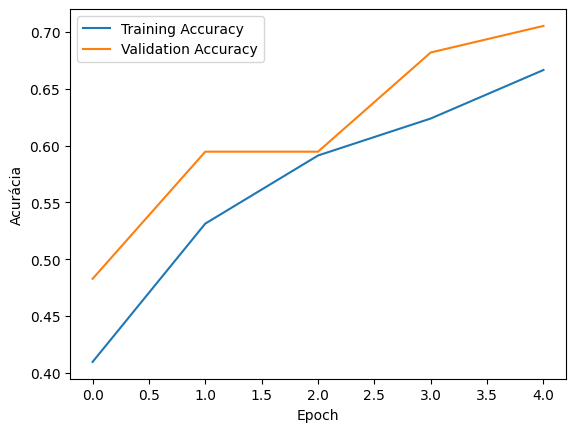

In [ ]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

## Seção IV: Execução do modelo de deep learning treinado nas imagens de teste

#### Execução do modelo com imagens do dataframe de teste

NÃO ACERTEI ESSE CÓDIGO, NA SEQUÊNCIA RODEI O MODELO TREINADO COM AS IMAGENS DO TEST GENERATOR

In [ ]:
# count_images = 0
# class_names = ['cavalo',
#                'elefante',
#                'galinha',
#                'vaca']
# y_pred = list() # para armazenar as categorias preditas das imagens do dataset de teste
# y_true = list() # para armazenar as categorias reais das imagens do dataset de teste

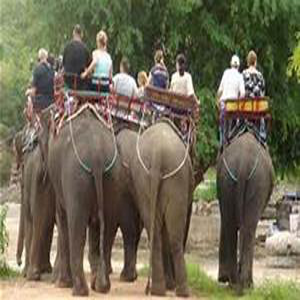

AttributeError: ignored

In [ ]:
# Reimportando a biblioteca treino, pois, durante os testes com o notebook, foi a única forma possível de executar essa etapa
#from keras.preprocessing import image

# Percorrendo as imagens do dataframe de teste para aplicação de modelo treinado
#for img_path, label in zip(df_test['images'], df_test['animal']):
#    _, file_extension = os.path.splitext(img_path)
    # if file_extension.lower() in ['.jpeg', '.jpg', '.png']:
    #     count_images += 1

    #     split_path = img_path.split('/')
    #     label = split_path[2]
    #     y_true.append(label)

    #     img = Image.open(img_path).resize((300, 300))
    #     display(img)

    #     img = image.load_img(img_path, target_size=(img_height, img_width))
    #     x = img_to_array(img)
    #     x = np.expand_dims(x, axis=0)
    #     x = x.astype('float32') / 255.0

        # Previsão
        # prediction = model.predict(x)

        # Printando as saídas do modelo
        # predicted_class = np.argmax(prediction[0])
        # probability = prediction[0][predicted_class]
        # y_pred.append(class_names[predicted_class])
        # print("Label:", label)
        # print("Previsão:", class_names[predicted_class])
        # print("Probabilidade:", probability)
        # print("\n")

In [ ]:
# Calculando as métricas do modelo aplicado as imagens de teste
# accuracy = skm.accuracy_score(y_true, y_pred)
# precision = skm.precision_score(y_true, y_pred, average='weighted')
# recall = skm.recall_score(y_true, y_pred, average='weighted')
# f1score = skm.f1_score(y_true, y_pred, average='weighted')

# print("Accuracy: ", accuracy)
# print("Precision: ", precision)
# print("Recall: ", recall)
# print("F1 Score: ", f1score)

#### Execução do modelo com test generator

In [ ]:
y_true_tg = test_generator.classes
y_pred_tg = np.argmax(model.predict(test_generator), axis=1)

classes = dict(zip(test_generator.class_indices.values(), test_generator.class_indices.keys()))
Predictions = pd.DataFrame({"Image Index": list(range(len(test_generator.labels))), # Índice da imagem no conjunto de teste
                            "Test Labels": test_generator.labels, # Rótulos reais das imagens no conjunto de teste
                            "Test Classes": [classes[i] for i in test_generator.labels], # Classes correspondentes aos rótulos reais
                            "Prediction Labels": y_pred_tg, # Rótulos previstos pelo modelo
                            "Prediction Classes": [classes[i] for i in y_pred_tg], # Classes correspondentes aos rótulos previstos
                            "Path": test_generator.filepaths, #Caminho dos arquivos de imagem
                            "Prediction Probability": [x for x in np.asarray(np.max(model.predict(test_generator), axis=1))] #Probabilidade da classe prevista pelo modelo
                           })
Predictions.head(10)

55/55 [==============================] - 2s 44ms/step


,Image Index,Test Labels,Test Classes,Prediction Labels,Prediction Classes,Path,Prediction Probability
0,0,1,elefante,0,cavalo,/content/elefante/OIP-mmNjPTEi-JVhv4aKiYpLGQHa...,0.825634
1,1,1,elefante,1,elefante,/content/elefante/OIP-7LSiJVl5T9JBJshmZXWNgQAA...,0.802112
2,2,0,cavalo,1,elefante,/content/cavalo/OIP-KgwxiD45b_uxH1E5la6xeQHaGN...,0.552179
3,3,1,elefante,0,cavalo,/content/elefante/OIP-jLkVAsM3KcDx6MHP850cfAHa...,0.576804
4,4,0,cavalo,0,cavalo,/content/cavalo/OIP-6Nq1ZBalkb6pcX06ZoA8OwHaFh...,0.639883
5,5,0,cavalo,1,elefante,/content/cavalo/OIP-ImqzQ7XONghviAnIFia_gwHaGV...,0.535233
6,6,1,elefante,1,elefante,/content/elefante/OIP-tvk7DqcaksIF5YXzg8WH5QHa...,0.983447
7,7,1,elefante,1,elefante,/content/elefante/ef32b1092cf11c22d2524518b744...,0.666610
8,8,1,elefante,1,elefante,/content/elefante/eb30b20d20f4023ed1584d05fb1d...,0.859922
9,9,2,galinha,2,galinha,/content/galinha/OIP-SlONAhirl_6qbZl0Su4RZAHaL...,0.933839


Plotando um subconjunto das imagens de teste com as respectivas previsões

In [ ]:
# Obtendo uma amostra aleatória de 10 linhas do DataFrame Predict

sample_predictions = Predictions.sample(n=10)

for index, row in sample_predictions.iterrows():
    # Obtendo as informações necessárias para visualização e impressão
    image = plt.imread(row['Path'])
    true_label = row['Test Classes']
    predicted_label = row['Prediction Classes']
    probability = row['Prediction Probability']

    # Arredondando a probabilidade para duas casas decimais
    probability = round(probability, 2)

    # Configuração da figura para exibir a imagem
    plt.figure()
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Impressão dos resultados da classificação
    print("True Label: ", true_label)
    print("Predicted Label: ", predicted_label)
    print("Probability: ", probability)
    print()

In [ ]:
# Calculando as métricas do modelo aplicado as imagens do teste generator
accuracy = skm.accuracy_score(y_true_tg, y_pred_tg)
precision = skm.precision_score(y_true_tg, y_pred_tg, average='weighted')
recall = skm.recall_score(y_true_tg, y_pred_tg, average='weighted')
f1score = skm.f1_score(y_true_tg, y_pred_tg, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1score)

#### Visualização de métricas da avaliação do modelo

Matriz de confusão sem normalização


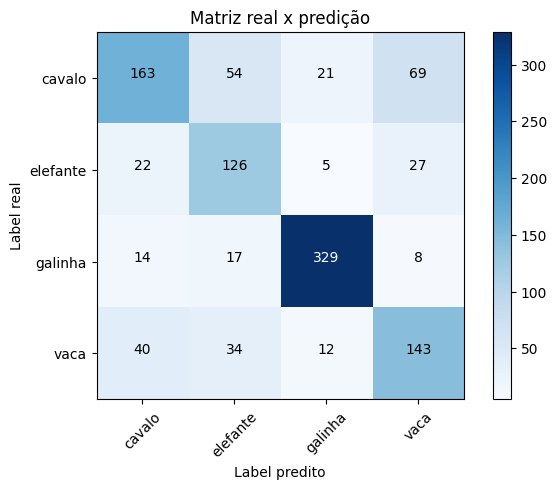

In [ ]:
# Definindo função para plotar a matriz de confusão
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt_str = '{:d}' if not normalize else '{:.2f}'

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, fmt_str.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label real')
    plt.xlabel('Label predito')

class_names = list(test_generator.class_indices.values())
y_pred_tg = Predictions['Prediction Labels']
y_test_tg = Predictions['Test Labels']
Map_class = test_generator.class_indices

cnf_matrix = confusion_matrix(y_true_tg, y_pred_tg, labels=class_names)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=Map_class,
                      normalize=False,
                      title='Matriz real x predição')

A matriz de confusão identifica onde o modelo de deep learning acertou e errou na classificação das imagens de teste

## Seção V: Exportação do modelo de deep learning para posterior uso

Salvando o modelo de deep learning que foi treinado

In [ ]:
# obtendo a data e hora atual
now = datetime.now()

# Definição do formato
format = '%Y-%m-%dT%H%M'

# Converter a data e hora em uma string com o formato especificado
formatted_datetime = now.strftime(format)

path_model = 'content/trained_models'

name_model = 'trained_model_' + formatted_datetime + '.h5'

# salvando o modelo
model.save("%s/%s" % (path_model, name_model))
print("Modelo salvo com o nome: ", name_model)

Modelo salvo com o nome:  trained_model_2023-07-23T0945.h5


## Seção VI: Teste do modelo exportado

Carregando o modelo salvo

In [ ]:
loaded_model = keras.models.load_model("%s/%s" % (path_model, name_model))
print("Modelo %s carregado com sucesso" % (name_model))

Modelo trained_model_2023-07-23T0945.h5 carregado com sucesso


Executando o modelo exportado para acompanhar as classificações de cada uma das imagens de teste

In [ ]:
count_images = 0
class_names = ['vaca', 'galinha', 'elefante', 'cavalo']
y_pred = list()
y_true = list()

# Percorrendo a pasta onde estão salvas as imagens de teste

for img_path, label in zip(df_test['images'], df_test['animal']):

    if img_path.endswith('.jpeg') or img_path.endswith('.jpg') or img_path.endswith('.png'):

            split_path = img_path.split('/')
            label = split_path[2]
            y_true.append(label)

            display(Image.open(img_path).resize((300, 300)))
            img = image.load_img(img_path, target_size=(img_height, img_width))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = x.astype('float32') / 255.0

            # Previsão
            prediction = model.predict(x)

            # Printando as saídas do modelo
            predicted_class = np.argmax(prediction[0])
            probability = prediction[0][predicted_class]
            y_pred.append(class_names[predicted_class])
            print("Rótulo Real:", label)
            print("Rótulo Previsto:", class_names[predicted_class])
            print("Probabilidade:", probability)
            print("\n")
